In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [20]:
data = []
dirs = ['bench', 'out', 'out2', 'out3', 'out4', 'out5', 'out6']
for d in dirs:
	data.append(pd.read_csv(d + '/experiment.csv'))

In [21]:
def plot(data):
	treatments = data['treatment'].unique()
	num_treatments = len(treatments)

	averages = pd.DataFrame(index=range(1, 76), columns=treatments)
	stds = pd.DataFrame(index=range(1, 76), columns=treatments)

	for treatment in treatments:
		round_averages = []
		round_stds = []
		for round in range(1, 76):
			round_df = data.loc[(data['treatment'] == treatment) & (data['round'] == round), ['player1_payout', 'player2_payout']].reset_index(drop=True)
			round_averages.append(((round_df['player1_payout'] + round_df['player2_payout']) / 2).mean())
			round_stds.append(((round_df['player1_payout'] + round_df['player2_payout']) / 2).std())
		averages[treatment] = round_averages
		stds[treatment] = round_stds

	sns.set_theme(style="whitegrid")

	n_cols = 3
	n_rows = math.ceil(num_treatments / n_cols)

	fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
	axs = axs.flatten()

	for i, treatment in enumerate(treatments):
		mean_vals = averages[treatment]
		std_vals = stds[treatment]
		sns.lineplot(x=mean_vals.index, y=mean_vals, ax=axs[i])
		axs[i].fill_between(mean_vals.index, mean_vals - std_vals, mean_vals + std_vals, color='b', alpha=0.2)
		axs[i].set_title(treatment)
		axs[i].set_xlabel('Round number')
		axs[i].set_ylabel('Average Payout')

	for j in range(len(treatments), len(axs)):
		fig.delaxes(axs[j])

	fig.suptitle('Average payouts with standard deviation', fontsize=16)
	plt.tight_layout(rect=[0, 0, 1, 0.96])
	#plt.savefig(f'comparison_plot.pdf')
	plt.show()

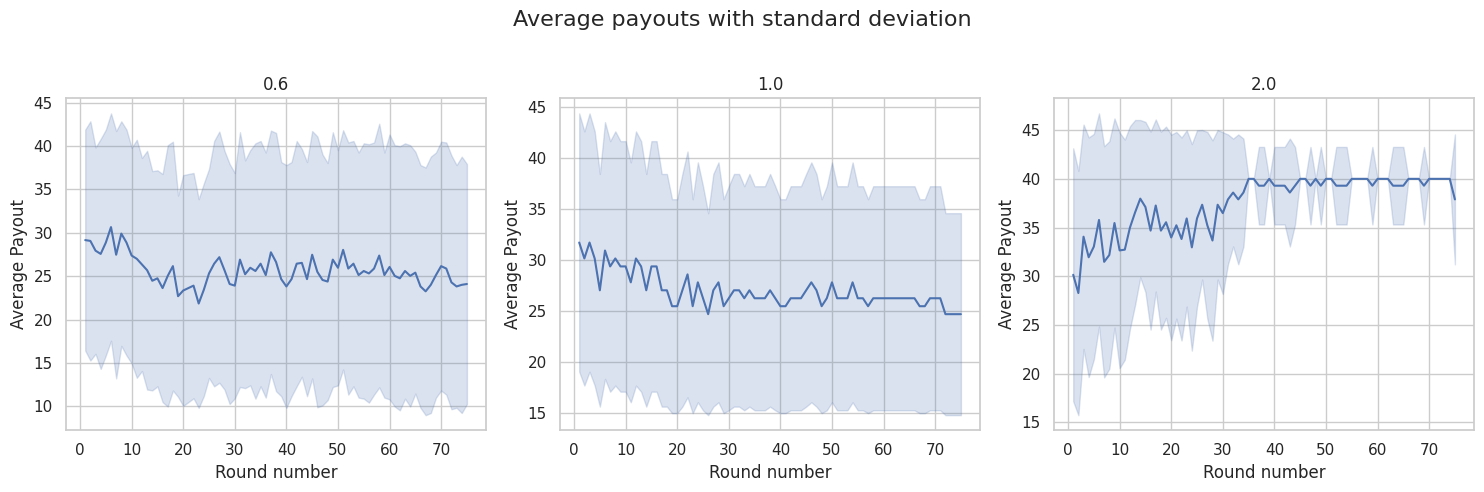

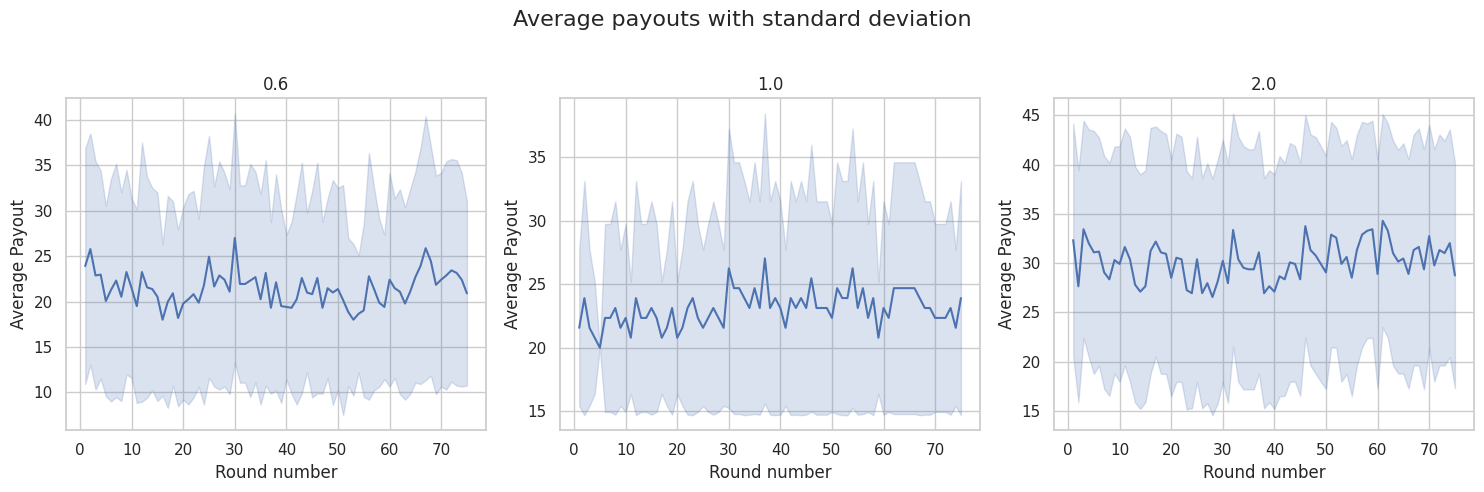

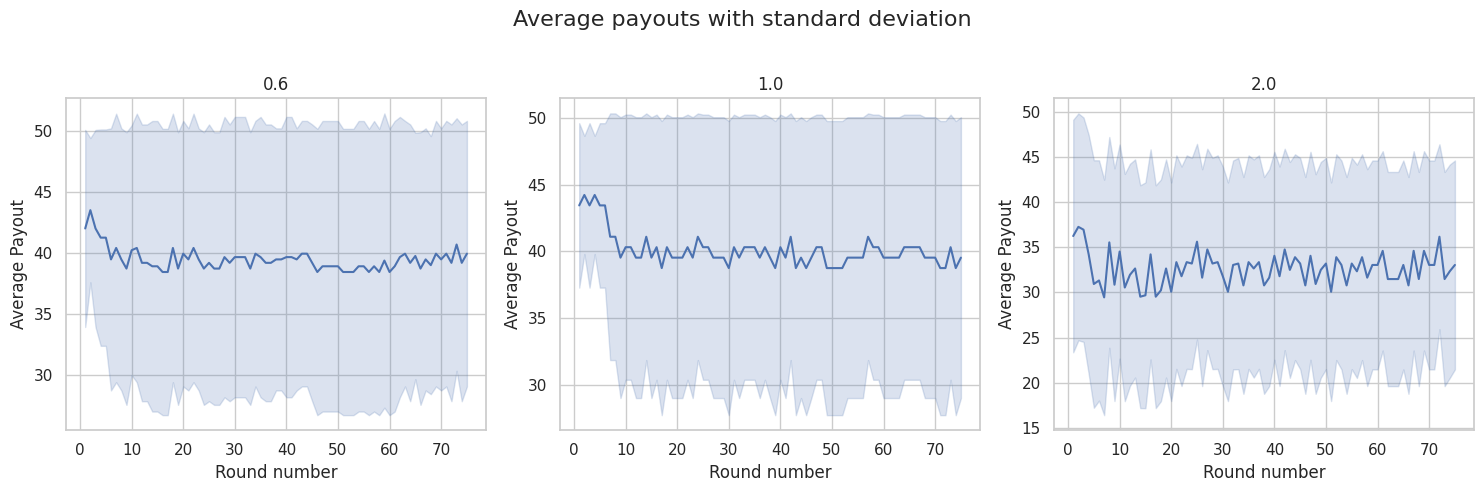

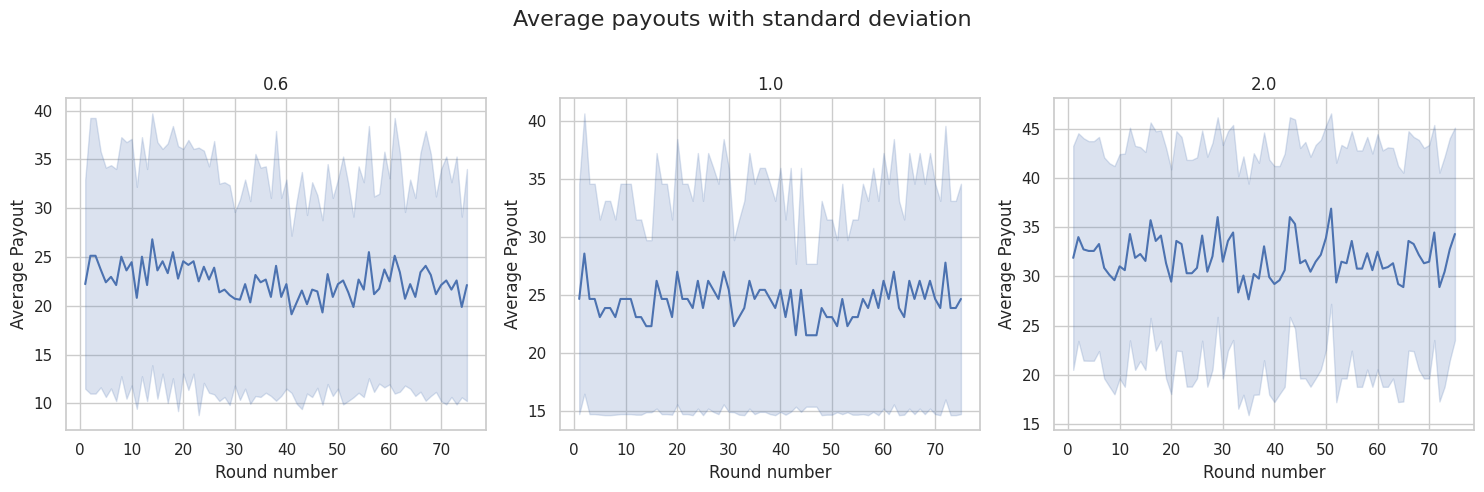

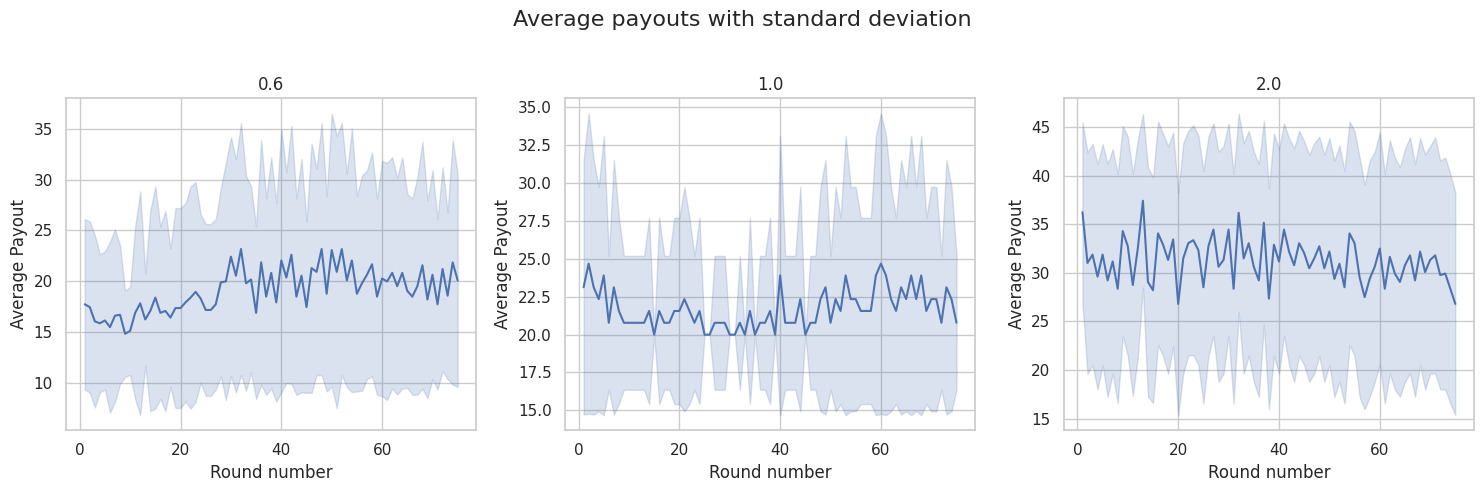

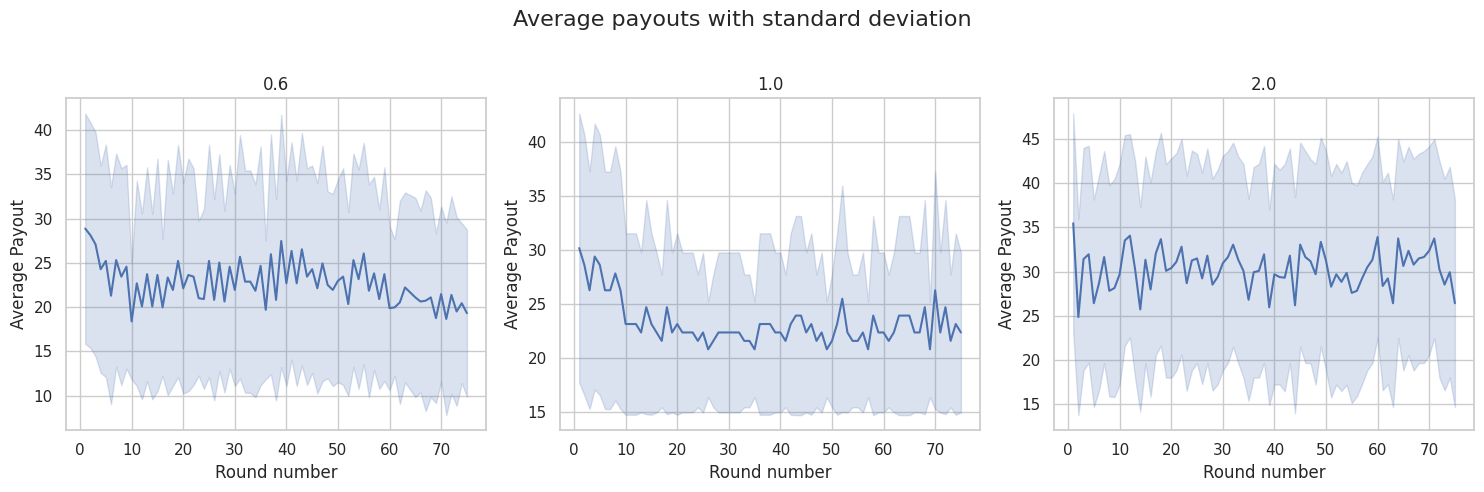

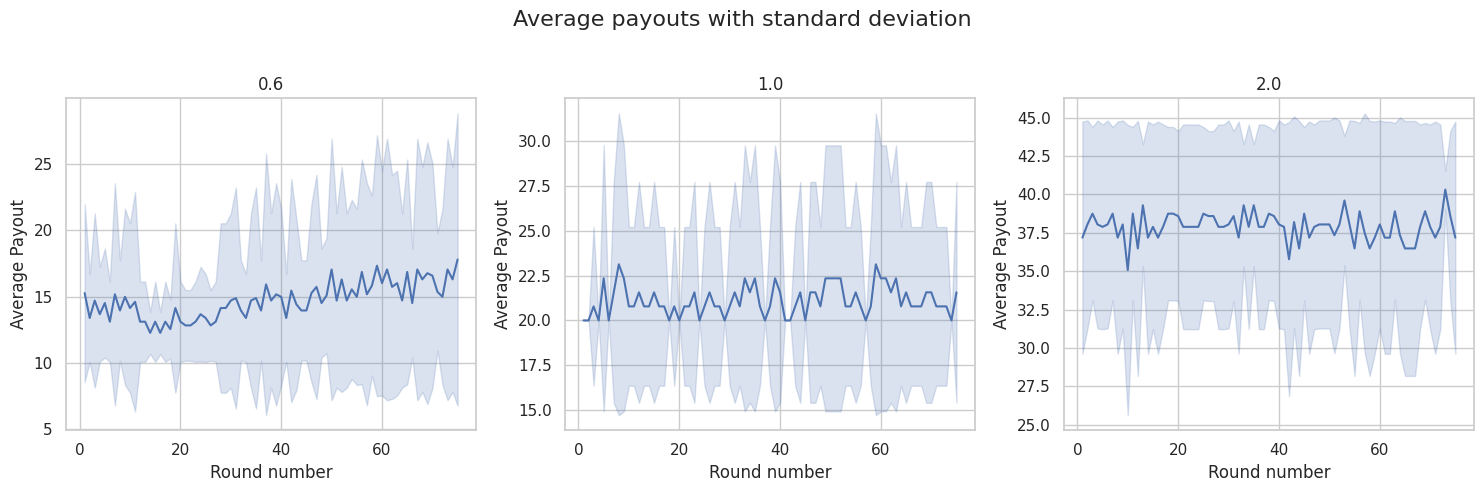

In [22]:
for d in data:
	plot(d)

In [23]:
def compute_averages(data, treatments):
	averages = pd.DataFrame(index=range(1, 76), columns=treatments)

	for treatment in treatments:
			round_averages = []
			for round in range(1, 76):
				round_df = data.loc[(data['treatment'] == treatment) & (data['round'] == round), ['player1_payout', 'player2_payout']].reset_index(drop=True)
				round_averages.append(((round_df['player1_payout'] + round_df['player2_payout']) / 2).mean())
			averages[treatment] = round_averages
	
	return averages

In [24]:
base_df = data[0]
treatments = base_df['treatment'].unique()
num_treatments = len(treatments)

base_averages = compute_averages(base_df, treatments)

<Axes: >

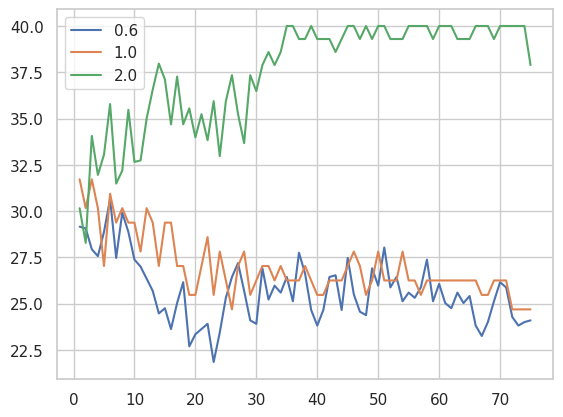

In [25]:
base_averages.plot()

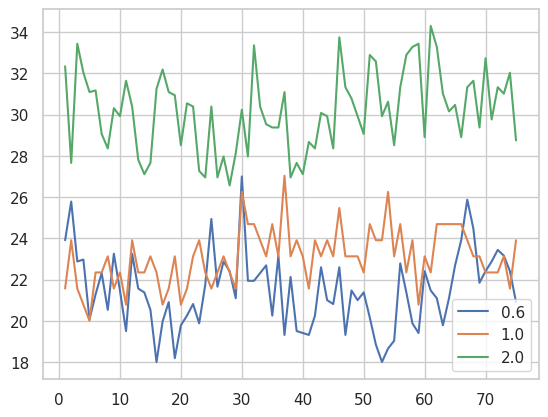

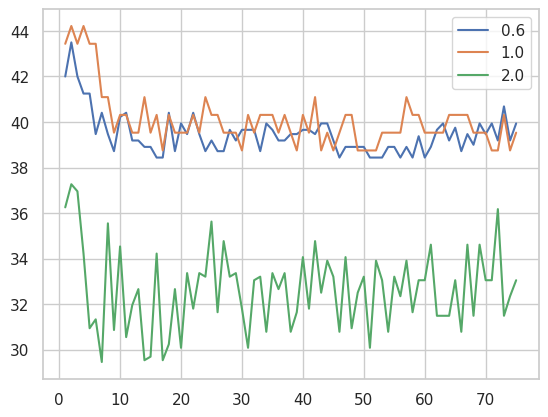

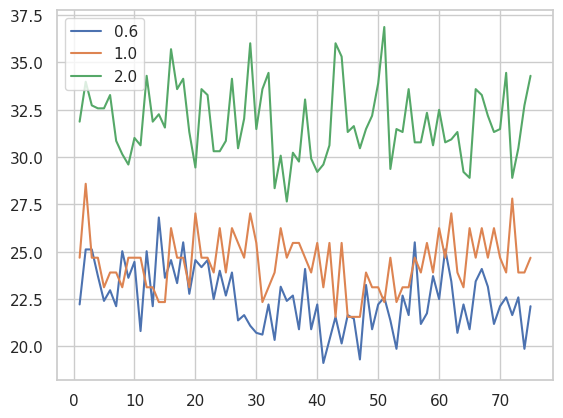

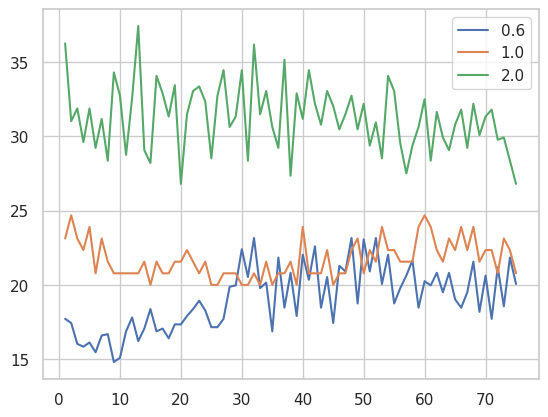

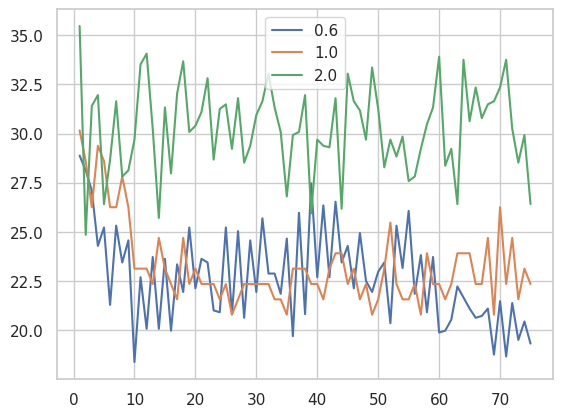

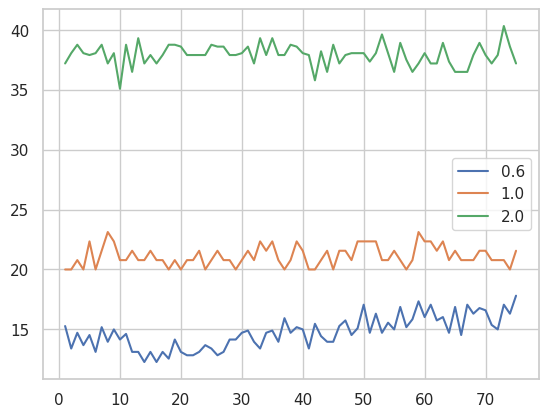

In [26]:
for exp_df in data[1:]:
	exp_averages = compute_averages(exp_df, treatments)
	exp_averages.plot()

In [27]:
%%script true
for exp_df in data[1:]:
	exp_averages = compute_averages(exp_df, treatments)
	exp_averages.plot()